**The plasma dispersion function**

The Hilbert Transform of the Gaussian focuses on the reactions, transformations, and calculations involved in plasma dispersion function. This notebook first offers information on the properties of Z, including symmetry properties, values for special arguments, power series, asymptotic expansion, and differential equation characterization. The python project notebook then ponders on the applications to plasma physics. Numerical calculations on the function of Z are presented. The python project notebook takes a look at table generation and accuracy wherein various methods are proposed in computing the error function in the multiple regions of the complex plane.

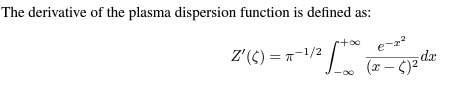

In [ ]:
pip install plasmapy

In [3]:
import plasmapy

In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [1]:
%matplotlib inline

In [5]:
import plasmapy.dispersion.dispersionfunction

In [ ]:
help(plasmapy.dispersion.dispersionfunction.plasma_dispersion_func)

We’ll now make some sample data to visualize the dispersion function

In [7]:
x = np.linspace(-1, 1, 1000)
X, Y = np.meshgrid(x, x)
Z = X + 1j * Y
print(Z.shape)

(1000, 1000)


Before we start plotting, let’s make a visualization function first

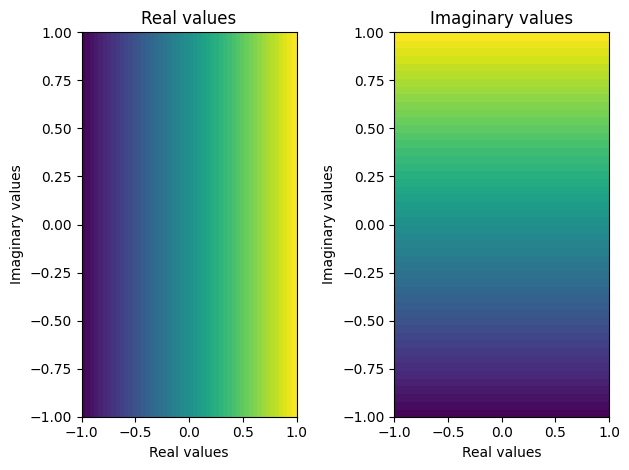

In [8]:
def plot_complex(X, Y, Z, N=50):
    fig, (real_axis, imag_axis) = plt.subplots(1, 2)
    real_axis.contourf(X, Y, Z.real, N)
    imag_axis.contourf(X, Y, Z.imag, N)
    real_axis.set_title("Real values")
    imag_axis.set_title("Imaginary values")
    for ax in [real_axis, imag_axis]:
        ax.set_xlabel("Real values")
        ax.set_ylabel("Imaginary values")
    fig.tight_layout()


plot_complex(X, Y, Z)

We can now apply our visualization function to our simple dispersion relation

In [9]:
# sphinx_gallery_thumbnail_number = 2

In [10]:
F = plasmapy.dispersion.dispersionfunction.plasma_dispersion_func(Z)

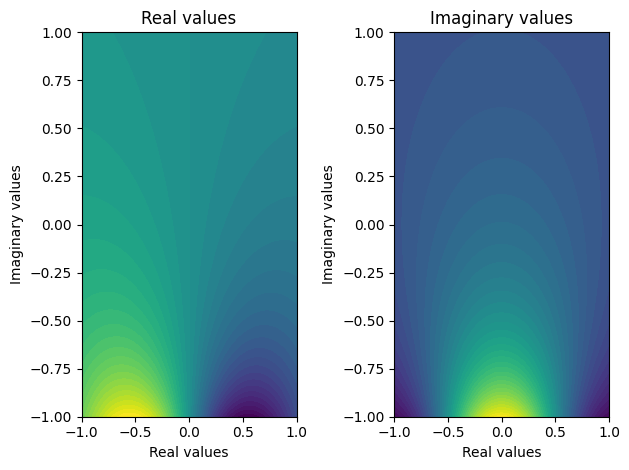

In [11]:
plot_complex(X, Y, F)

So this is going to be a hack and I’m not 100% sure the dispersion function is quite what I think it is, but let’s find the area where the dispersion function has a lesser than zero real part because I think it may be important

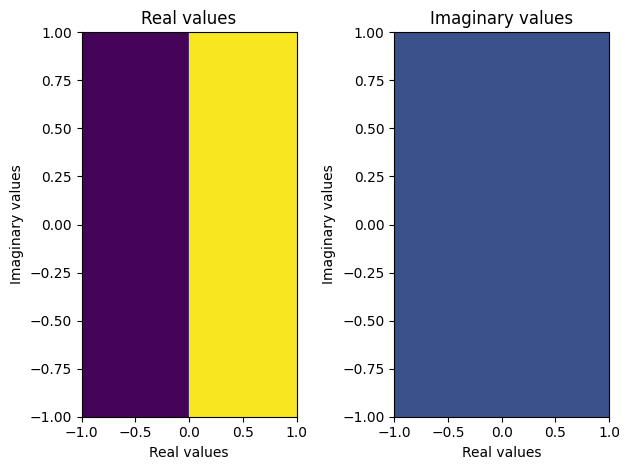

In [12]:
plot_complex(X, Y, F.real < 0)

We can also visualize the derivative

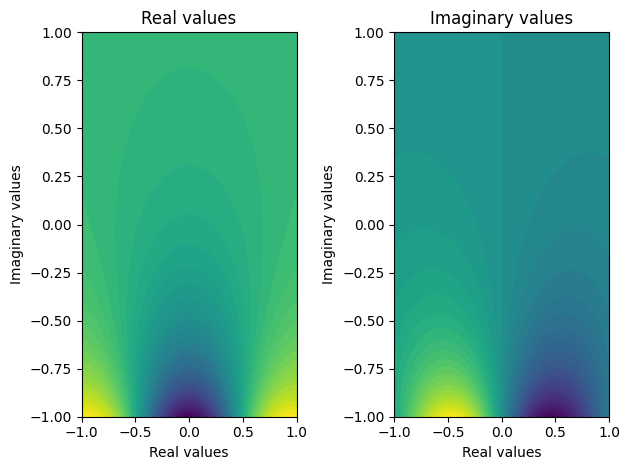

In [13]:
F = plasmapy.dispersion.dispersionfunction.plasma_dispersion_func_deriv(Z)
plot_complex(X, Y, F)

Plotting the same function on a larger area

In [14]:
x = np.linspace(-2, 2, 2000)
X, Y = np.meshgrid(x, x)
Z = X + 1j * Y
print(Z.shape)

(2000, 2000)


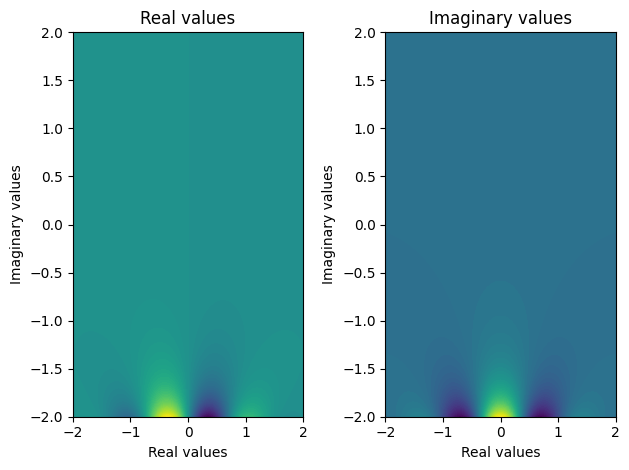

In [15]:
F = plasmapy.dispersion.dispersionfunction.plasma_dispersion_func(Z)
plot_complex(X, Y, F, 100)

Now we examine the derivative of the dispersion function as a function of the phase velocity of an electromagnetic wave propagating through the plasma

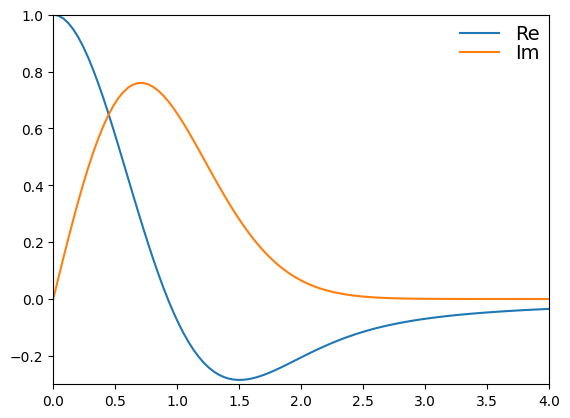

In [16]:
xs = np.linspace(0, 4, 100)
ws = (-1 / 2) * plasmapy.dispersion.dispersionfunction.plasma_dispersion_func_deriv(xs)
wRe = np.real(ws)
wIm = np.imag(ws)

plt.plot(xs, wRe, label="Re")
plt.plot(xs, wIm, label="Im")
plt.axis([0, 4, -0.3, 1])
plt.legend(
    loc="upper right", frameon=False, labelspacing=0.001, fontsize=14, borderaxespad=0.1
)
plt.show()